In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [21]:
df = pd.read_csv('/content/Stores.csv', low_memory = False, memory_map = True, index_col = None)

In [23]:
df.head

<bound method NDFrame.head of      Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
..         ...         ...              ...                   ...          ...
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340

[896 rows x 5 columns

In [24]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [25]:
df.axes

[RangeIndex(start=0, stop=896, step=1),
 Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
        'Store_Sales'],
       dtype='object')]

In [26]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [28]:
df.axes

[RangeIndex(start=0, stop=896, step=1),
 Index(['store_id_', 'store_area', 'items_available', 'daily_customer_count',
        'store_sales'],
       dtype='object')]

In [31]:
df.memory_usage()

Index                    128
store_id_               7168
store_area              7168
items_available         7168
daily_customer_count    7168
store_sales             7168
dtype: int64

In [33]:
df.sample(6)

,store_id_,store_area,items_available,daily_customer_count,store_sales
64,65,1544,1821,590,58660
342,343,1638,1952,690,81840
274,275,1631,1967,1090,69600
549,550,869,1050,850,52540
554,555,1832,2185,840,87330
814,815,1218,1459,540,87890


In [34]:
df.shape

(896, 5)

In [35]:
length = df.shape[0]

In [93]:
def custom_hist(df : pd.Series):

  fig = plt.figure(figsize = (6, 6))
  ax =fig.add_subplot()
  plt.hist(df, color = 'red', edgecolor = 'skyblue', density = True, bins = 25, label = 'Histogram')
  df.plot.kde()
  plt.axvline(df.mean(), color = 'pink', linestyle = 'dashed', linewidth = 2, label  = 'mean')
  plt.axvline(np.quantile(df, 0.25), color = 'green', linestyle = 'dashed', linewidth = 2, label = '0,25Quantile')
  plt.axvline(np.median(df), color = 'brown', linestyle = 'dashed', linewidth = 2, label = 'median')
  plt.axvline(np.quantile(df, 0.75), color = 'white', linestyle = 'dashed', linewidth = 2, label = '0,75 quantile')
  plt.legend(loc = 'upper left')
  plt.title('Histogram')
  plt.xlabel('Values of histogram')
  plt.ylabel('Counter of values if histogram')
  plt.xticks(rotation = 60)
  plt.minorticks_on()
  plt.grid(which = 'minor', ls = '--')
  plt.grid(which = 'major', ls = ':')
  plt.show();

def describe_columns(df : pd.Series):

  print(f'Количество пропусков : {df.isna().mean()}')
  print(f'Тип данных : {df.dtypes}')

In [113]:
# 932.000000
#25%      1575.500000
# 50%      1773.500000
# 75%      1982.750000
# max      2667.000000
def categorize_items(counter : int, first_quantile : int, second_quantile : int, average : int, maximum : int):
  if counter >= 932.00 and counter <= first_quantile:
    return 'Low items'
  
  elif counter >= first_quantile and counter <= average:
    return 'Mid items'

  elif counter >= average and counter <= second_quantile:
    return 'More them mid items'

  elif counter >= second_quantile and counter <= maximum:
    return 'High items'

In [38]:
df.head()

,store_id_,store_area,items_available,daily_customer_count,store_sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [41]:
len(df['store_id_'].unique()) == length

True

In [48]:
# store_area

In [49]:
plt.style.use('dark_background')

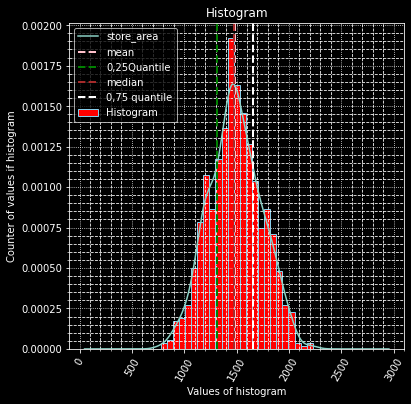

In [52]:
custom_hist(df['store_area'])

In [55]:
describe_columns(df['store_area'])

Количество пропусков : 0.0
Тип данных : int64


In [56]:
len(df['store_area'].unique())

583

In [57]:
df.size

4480

In [58]:
df['intervals_area'] = pd.qcut(df['store_area'], 4, duplicates = 'drop')

In [59]:
df.groupby('intervals_area')['store_sales'].agg(['count', 'sum']).sort_values('sum', ascending = False).reset_index()

,intervals_area,count,sum
0,"(1653.5, 2229.0]",224,13769020
1,"(1477.0, 1653.5]",223,13294660
2,"(774.999, 1316.75]",224,13095860
3,"(1316.75, 1477.0]",225,13019230


In [60]:
df = df.drop(['intervals_area'], axis = 1)

In [61]:
df['intervals_area'] = pd.qcut(df['store_area'], 4, labels = ['very_low_area', 'low_area', 'middle_area', 'big_area'], duplicates = 'drop')

In [63]:
t = df.groupby('intervals_area')['store_sales'].agg(['count', 'sum']).sort_values('sum', ascending = False).reset_index()

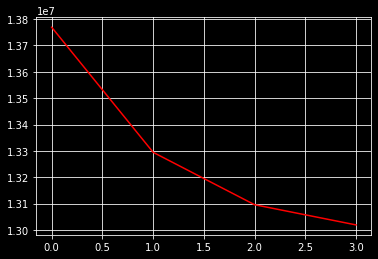

In [69]:
t.sort_values('sum', ascending = False)['sum'].plot(grid = True, color = 'red')

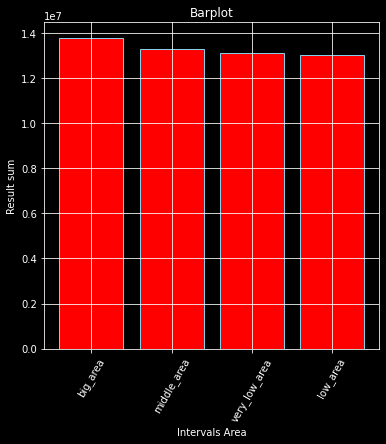

In [66]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot()
plt.bar(np.array(t['intervals_area']), t['sum'], color = 'red', edgecolor = 'skyblue', label = 'barplot of area and result sum')
plt.title('Barplot')
plt.xlabel('Intervals Area')
plt.ylabel('Result sum')
plt.xticks(np.array(t['intervals_area']),rotation = 60)
plt.grid()
plt.show();

In [70]:
df.head()

,store_id_,store_area,items_available,daily_customer_count,store_sales,intervals_area
0,1,1659,1961,530,66490,big_area
1,2,1461,1752,210,39820,low_area
2,3,1340,1609,720,54010,low_area
3,4,1451,1748,620,53730,low_area
4,5,1770,2111,450,46620,big_area


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


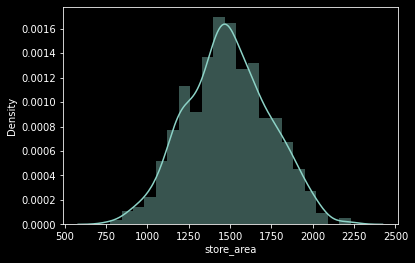

In [75]:
sns.distplot(df['store_area']);

In [78]:
np.std(df['store_area'])

250.09733077990157

In [79]:
np.var(df['store_area'])

62548.6748632315

In [80]:
# items_available

In [85]:
df.select_dtypes(include = ['int']).axes

[RangeIndex(start=0, stop=896, step=1),
 Index(['store_id_', 'store_area', 'items_available', 'daily_customer_count',
        'store_sales'],
       dtype='object')]

In [86]:
df.head()

,store_id_,store_area,items_available,daily_customer_count,store_sales,intervals_area
0,1,1659,1961,530,66490,big_area
1,2,1461,1752,210,39820,low_area
2,3,1340,1609,720,54010,low_area
3,4,1451,1748,620,53730,low_area
4,5,1770,2111,450,46620,big_area


In [87]:
null_cols = df.columns[df.isna().any()]
null_cols

Index([], dtype='object')

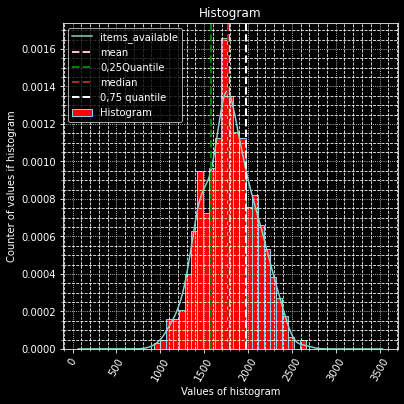

In [91]:
  custom_hist(df['items_available'])

In [108]:
df.items_available.describe(include = 'all')

count     896.000000
mean     1782.035714
std       299.872053
min       932.000000
25%      1575.500000
50%      1773.500000
75%      1982.750000
max      2667.000000
Name: items_available, dtype: float64

In [114]:
df.head()

,store_id_,store_area,items_available,daily_customer_count,store_sales,intervals_area,col
0,1,1659,1961,530,66490,big_area,DA
1,2,1461,1752,210,39820,low_area,DA
2,3,1340,1609,720,54010,low_area,DA
3,4,1451,1748,620,53730,low_area,DA
4,5,1770,2111,450,46620,big_area,DA


In [115]:
# def categorize_items(counter : int, first_quantile : int, second_quantile : int, average : int, maximum : int):

In [121]:
df['categorize_count_values'] = df['items_available'].apply(lambda x: categorize_items(x, np.quantile(df['items_available'], 0.25), \
                                                                                       np.quantile(df['items_available'], 0.75),\
                                                                                       np.mean(df['items_available']),\
                                                                                       max(df['items_available'])))

In [119]:
df = df.drop(['col'], axis = 1)

In [122]:
df.head()

,store_id_,store_area,items_available,daily_customer_count,store_sales,intervals_area,categorize_count_values
0,1,1659,1961,530,66490,big_area,More them mid items
1,2,1461,1752,210,39820,low_area,Mid items
2,3,1340,1609,720,54010,low_area,Mid items
3,4,1451,1748,620,53730,low_area,Mid items
4,5,1770,2111,450,46620,big_area,High items


In [131]:
eror_table = df.groupby('categorize_count_values')['store_sales'].agg(['count', 'sum', 'mean']).reset_index()

In [132]:
eror_table

,categorize_count_values,count,sum,mean
0,High items,224,13832660,61752.946429
1,Low items,224,13015230,58103.705357
2,Mid items,234,13695110,58526.111111
3,More them mid items,214,12635770,59045.654206


In [135]:
df['categorize_items_counter'] = pd.qcut(df['items_available'], 4, labels = ['Low items', 'Mid items', 'More them mid itmes', 'High Items'])

In [136]:
right_table = df.groupby('categorize_items_counter')['items_available'].agg(['sum', 'mean', 'median', 'count']).sort_values('sum', ascending = False).reset_index()

In [137]:
right_table


,categorize_items_counter,sum,mean,median,count
0,High Items,486463,2171.709821,2145.0,224
1,More them mid itmes,419190,1871.383929,1869.0,224
2,Mid items,377846,1686.812500,1695.5,224
3,Low items,313205,1398.236607,1431.5,224


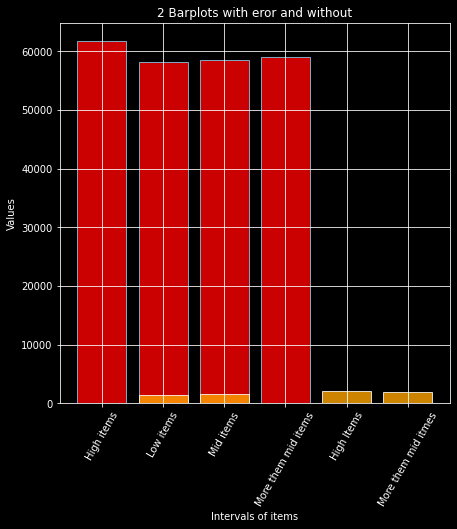

In [148]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.bar(np.array(eror_table['categorize_count_values']), eror_table['mean'], color = 'red', edgecolor = 'skyblue', alpha = 0.8, label = 'eror_barplot')
plt.bar(np.array(right_table['categorize_items_counter']), right_table['mean'],
        color = 'orange', edgecolor = 'white',
        alpha = 0.8, label = 'right barplot')
plt.title('2 Barplots with eror and without')
plt.xlabel('Intervals of items')
plt.ylabel('Values')
plt.grid()
plt.xticks(rotation = 60)
plt.show();

In [149]:
# Очевидно что при таком сравнении первая выборка просто ужасная)

In [150]:
df.head()

,store_id_,store_area,items_available,daily_customer_count,store_sales,intervals_area,categorize_count_values,categorize_items_counter
0,1,1659,1961,530,66490,big_area,More them mid items,More them mid itmes
1,2,1461,1752,210,39820,low_area,Mid items,Mid items
2,3,1340,1609,720,54010,low_area,Mid items,Mid items
3,4,1451,1748,620,53730,low_area,Mid items,Mid items
4,5,1770,2111,450,46620,big_area,High items,High Items


In [151]:
# store_sales


In [152]:
describe_columns(df['store_sales'])

Количество пропусков : 0.0
Тип данных : int64


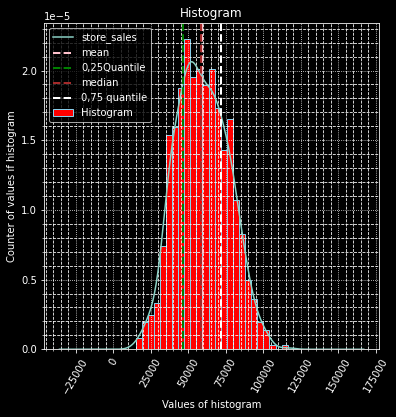

In [154]:
custom_hist(df['store_sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


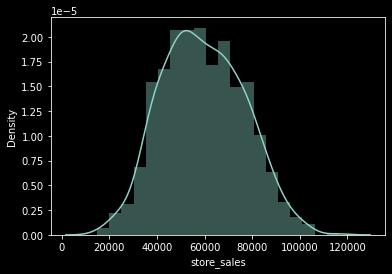

In [156]:
sns.distplot(df['store_sales'])

In [157]:
df['interval_sales'] = pd.qcut(df['store_sales'], 4,  labels = ['Cheapest', 'Cheap', 'Middle', 'Expensive'], duplicates = 'drop')

In [1]:
df.groupby('interval_sales')['items_available'].agg(['sum', 'count', 'mean', w'median']).reset_index().sort_values('sum', ascending = False)

NameError: ignored